<h1 align="center"><i><u><b>CaixaBank Tech Hackathon</i></u></b></h1>

**Author:** *Anass Anhari*

**Date:** *28/05/22*

**Using:** *Anaconda3*

In [4]:
# Requirements (Using anaconda3)
%pip install -q mplfinance

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mplf

%matplotlib inline

# **Dataset**

In [6]:
df_train = pd.read_csv('train.csv', index_col=0, parse_dates=True)

# Headers
DATE       = 'Date'
OPEN       = 'Open'
HIGH       = 'High'
LOW        = 'Low'
CLOSE      = 'Close'
ADJ_CLOSE  = 'Adj Close'
VOLUME     = 'Volume'
TARGET     = 'Target'
TEST_INDEX = 'test_index'

print(f'Shape: {df_train.shape}')
print(df_train.dtypes)
df_train

Shape: (6554, 7)
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
Target         int64
dtype: object


,Open,High,Low,Close,Adj Close,Volume,Target
Date,,,,,,,
1994-01-03,3615.199951,3654.699951,3581.000000,3654.500000,3654.496338,0.0,0
1994-01-04,3654.500000,3675.500000,3625.100098,3630.300049,3630.296387,0.0,1
1994-01-05,3625.199951,3625.199951,3583.399902,3621.199951,3621.196289,0.0,1
1994-01-06,NaN,NaN,NaN,NaN,NaN,NaN,0
1994-01-07,3621.199951,3644.399902,3598.699951,3636.399902,3636.396240,0.0,1
...,...,...,...,...,...,...,...
2019-05-24,9150.299805,9211.099609,9141.400391,9174.599609,9174.599609,121673100.0,0
2019-05-27,9225.900391,9294.599609,9204.700195,9216.400391,9216.400391,60178000.0,0
2019-05-28,9220.400391,9224.900391,9132.900391,9191.799805,9191.799805,218900800.0,0


# **Data formatting**
*We could either replace all rows with empty fields (aka NaN) with 0.0 or drop them from the data set*

In [7]:
df_train = df_train.dropna(axis=0, how='any')
df_train

,Open,High,Low,Close,Adj Close,Volume,Target
Date,,,,,,,
1994-01-03,3615.199951,3654.699951,3581.000000,3654.500000,3654.496338,0.0,0
1994-01-04,3654.500000,3675.500000,3625.100098,3630.300049,3630.296387,0.0,1
1994-01-05,3625.199951,3625.199951,3583.399902,3621.199951,3621.196289,0.0,1
1994-01-07,3621.199951,3644.399902,3598.699951,3636.399902,3636.396240,0.0,1
1994-01-10,3655.199951,3678.199951,3655.199951,3660.600098,3660.596436,0.0,1
...,...,...,...,...,...,...,...
2019-05-24,9150.299805,9211.099609,9141.400391,9174.599609,9174.599609,121673100.0,0
2019-05-27,9225.900391,9294.599609,9204.700195,9216.400391,9216.400391,60178000.0,0
2019-05-28,9220.400391,9224.900391,9132.900391,9191.799805,9191.799805,218900800.0,0


## **Simple analysis of the problem**

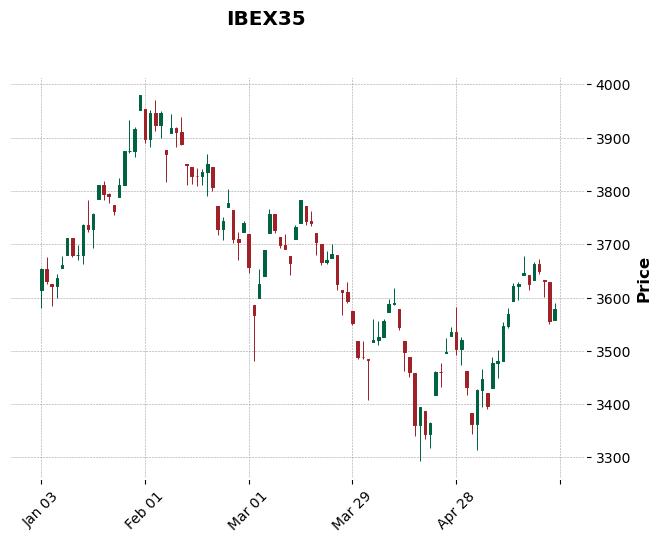

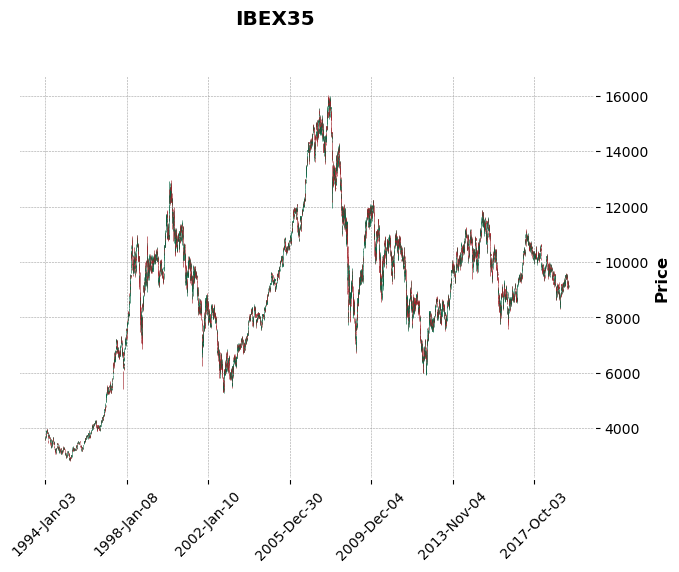

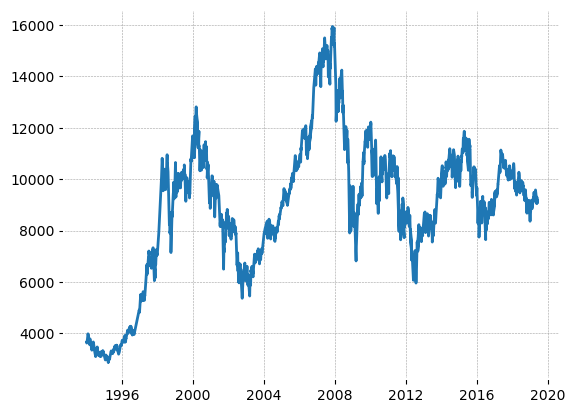

In [8]:
# df_train.index = pd.DatetimeIndex(df_train['Date'])

mplf.plot(
    df_train.iloc[:100,:],
    type='candle',
    title='IBEX35',
    style='charles',
    ylabel='Price',
)

mplf.plot(
    df_train,
    type='candle',
    title='IBEX35',
    style='charles',
    ylabel='Price',
    warn_too_much_data=len(df_train)
)

plt.plot(df_train.index, df_train[CLOSE])

For now, we know that the stock market (aka IBEX35) tends to be very volatile.

But, that does not mean that the prediction is impossible. So, we want to predict a $target$  that defines:

\begin{gather}
target (boolean) = close_{day+3} > close_{day}
\end{gather}

The strategy of working of ML/AI it's very experimental, so, we could think about different aproaches:

1) *Classification*. We want a target/vector *[y] (1 x 1)* defining a boolean for each vector *[X] (N x 1)*, this boolean just tells us if the closing price 3 days ahead will be greater than the actual day. Thats why we could think about a classification model, classifying for each vectory *[X]* the target (True/False or 1/0). 

2) *Regression*. It's a good idea to test a regression in base of the closing price. Predict the closing price 3 days ahead. So, cheking thr actual price and the price 3 days later we could determinate the *target* value.

3) *Time Series*. Analysing and forecasting the 

Just for fun we'll try the first approoach because it is very simple to generate the model, the second approcach we could get more important results and surely using the third strategy we'll obtain better results (more difficult and with a more complex analysis) using moving average... thecniques from events happened on the past for being able to predict the stock price 3 days ahead.

# **Testing Data**

Before continuing, the file **test_x.csv** does not contain the *target* column that we need for evaluating our model predictions performance

In [9]:
df_test = pd.read_csv('test_x.csv', index_col=0)
df_test

,Date,Open,High,Low,Close,Adj Close,Volume
test_index,,,,,,,
6557,2019-06-05,9136.799805,9173.400391,9095.000000,9150.500000,9150.500000,158753000.0
6558,2019-06-06,9169.200195,9246.200195,9136.700195,9169.200195,9169.200195,212720900.0
6559,2019-06-07,9186.700195,9261.400391,9185.700195,9236.099609,9236.099609,150664700.0
6560,2019-06-10,9284.200195,9302.200195,9248.099609,9294.099609,9294.099609,102323700.0
6561,2019-06-11,9288.599609,9332.500000,9273.400391,9282.099609,9282.099609,144701200.0
...,...,...,...,...,...,...,...
7278,2022-03-25,8314.099609,8363.200195,8286.500000,8330.599609,8330.599609,156189000.0
7279,2022-03-28,8354.400391,8485.700195,8354.400391,8365.599609,8365.599609,167961800.0
7280,2022-03-29,8451.000000,8621.000000,8419.700195,8614.599609,8614.599609,257812200.0


In [10]:
test_target_size = len(df_test)
target = np.zeros(test_target_size).astype(int)
for test_index in range(test_target_size-3):
    target[test_index] = df_test.iloc[test_index+3][CLOSE] > df_test.iloc[test_index][CLOSE]

df_test[TARGET] = target
df_test

# NOTE: We should have to drop the last 3 rows because we have no further data, but i don't clearly now if the json has to contain all the indexes ...
# df_test = df_test.iloc[:-3,:]

,Date,Open,High,Low,Close,Adj Close,Volume,Target
test_index,,,,,,,,
6557,2019-06-05,9136.799805,9173.400391,9095.000000,9150.500000,9150.500000,158753000.0,1
6558,2019-06-06,9169.200195,9246.200195,9136.700195,9169.200195,9169.200195,212720900.0,1
6559,2019-06-07,9186.700195,9261.400391,9185.700195,9236.099609,9236.099609,150664700.0,1
6560,2019-06-10,9284.200195,9302.200195,9248.099609,9294.099609,9294.099609,102323700.0,0
6561,2019-06-11,9288.599609,9332.500000,9273.400391,9282.099609,9282.099609,144701200.0,0
...,...,...,...,...,...,...,...,...
7278,2022-03-25,8314.099609,8363.200195,8286.500000,8330.599609,8330.599609,156189000.0,1
7279,2022-03-28,8354.400391,8485.700195,8354.400391,8365.599609,8365.599609,167961800.0,1
7280,2022-03-29,8451.000000,8621.000000,8419.700195,8614.599609,8614.599609,257812200.0,0


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import f1_score, max_error, mean_squared_error, mean_absolute_error

X_train = df_train.iloc[:, :-1]
y_train = df_train[TARGET]

# **Model-1: Decision Tree Classifier**

In [12]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(
    max_depth=20
)

In [13]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20)

In [14]:
# Testing dataset
X_test = df_test.iloc[:, 1:-1]
y_test = df_test[TARGET]

# Predictions
y_pred = clf.predict(X_test)

In [15]:
f1_score(
    average='macro',
    y_true=y_test,
    y_pred=y_pred
)

0.5140981607092517

We can see that the score is around 50%, that is to say that the score always will have a random factor of 50% chance.
Normalizing the data on Trees does not affect that much, but we could iterate and visualize for each depth that we append how te score varies

0.5254649510157858 (array([50]),)


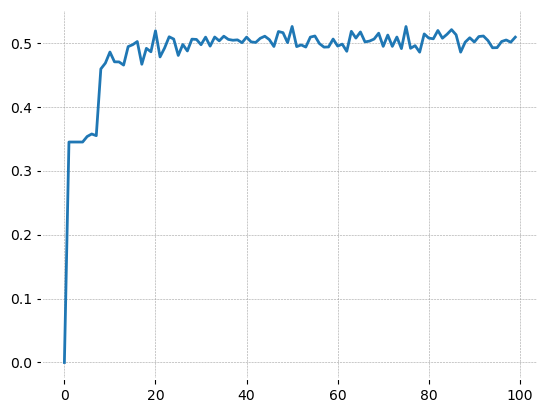

In [16]:
depths = np.array(range(100))
scores = np.zeros(100)

for depth in depths[1:]:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train, y_train)

    scores[depth] = f1_score(
        average='macro',
        y_true=y_test,
        y_pred=clf.predict(X_test)
    )

print(max(scores), np.where(scores == max(scores)))
plt.plot(depths, scores)

In [17]:
clf = DecisionTreeClassifier(max_depth=50)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
f1_score(
    average='macro',
    y_true=y_test,
    y_pred=y_pred
)

0.5042219335104916

In [18]:
df_pred = pd.DataFrame(
    data = y_pred,
    columns=[TARGET],
    index=df_test.index
)

df_test
df_pred.to_csv('predictions.csv')
df_pred.to_json('predictions.json')

> NOTE: Finally we can see that using decission trees (as we could've expected) the prediction chance is around 50%. Obvioulsy incrementing the number of the depth we are overfitting the model putting **too much noise** and the model would perform even worse.

# **Model-2: Random Forest Classifier**

In [19]:
clf = RandomForestClassifier(n_estimators=25)
clf.fit(X_train, y_train)

f1_score(
    average='macro',
    y_true=y_test,
    y_pred=clf.predict(X_test)
)

0.49262953684467803

> NOTE: Finally, we've seen that using decision trees the score is low around 50% as we could've have expected.

# **Model-3: Linear Regression || Random Forest Regressor**

In [20]:
from sklearn.linear_model import LinearRegression

pd.options.mode.chained_assignment = None # For ignoring the warnings of copy operations (we should have to investigate the reason of the warnings ...)
close_3_days = np.zeros(len(X_train))

for date in range(len(X_train) - 3):
    # NOTE: This is an approximation, because on the dataset there are missing
    # dates between rows. For know i've ignored this fact (we could fill a value 
    # on a certain period of time, ...)
    close_3_days[date] = df_train.iloc[date+3][CLOSE]

# Adding the closing price "3" days ahead from the actual day
df_train[f'{CLOSE}-3'] = close_3_days

# We add also a row for checking the given TARGET vector prediction vs my approximated 
# TARGET.
df_train[f'{TARGET}-check'] = df_train[f'{CLOSE}-3'] > df_train[CLOSE]
df_train[f'{TARGET}-check'] = df_train[f'{TARGET}-check'].astype(int)

print(f1_score(df_train[f'{TARGET}-check'],df_train[TARGET])) 
# 0.9822209268434859 (OK! the missing rows does not affect the TARGET vector with my approx)

df_train.head(20)

0.9822209268434859


,Open,High,Low,Close,Adj Close,Volume,Target,Close-3,Target-check
Date,,,,,,,,,
1994-01-03,3615.199951,3654.699951,3581.000000,3654.500000,3654.496338,0.0,0,3636.399902,0
1994-01-04,3654.500000,3675.500000,3625.100098,3630.300049,3630.296387,0.0,1,3660.600098,1
1994-01-05,3625.199951,3625.199951,3583.399902,3621.199951,3621.196289,0.0,1,3712.399902,1
1994-01-07,3621.199951,3644.399902,3598.699951,3636.399902,3636.396240,0.0,1,3680.100098,1
1994-01-10,3655.199951,3678.199951,3655.199951,3660.600098,3660.596436,0.0,1,3680.800049,1
1994-01-11,3679.699951,3712.500000,3679.699951,3712.399902,3712.396240,0.0,1,3736.399902,1
1994-01-12,3712.300049,3712.300049,3675.899902,3680.100098,3680.096436,0.0,1,3729.100098,1
1994-01-13,3680.100098,3698.199951,3670.399902,3680.800049,3680.796387,0.0,1,3757.000000,1
1994-01-14,3680.800049,3737.399902,3662.899902,3736.399902,3736.395996,0.0,1,3811.300049,1


In [21]:
X_train = df_train.drop([f'{CLOSE}-3', TARGET, f'{TARGET}-check'], axis=1)
y_train = df_train[f'{CLOSE}-3']

reg = LinearRegression()
# reg = RandomForestRegressor()

reg.fit(X_train, y_train)

LinearRegression()

In [22]:
df_test = pd.read_csv('test_x.csv', index_col=1, parse_dates=True)
close_3_days = np.zeros(len(X_test))

for date in range(len(X_test) - 3):
    # NOTE: This is an approximation, because on the dataset there are missing
    # dates between rows. For know i've ignored this fact (we could fill a value 
    # on a certain period of time, ...)
    close_3_days[date] = df_test.iloc[date+3][CLOSE]

# Adding the closing price "3" days ahead from the actual day
df_test[f'{CLOSE}-3'] = close_3_days

# Adding a TARGET testing vector
df_test[TARGET] = df_test[f'{CLOSE}-3'] > df_test[CLOSE]
df_test[TARGET] = df_test[TARGET].astype(int)

df_test

,test_index,Open,High,Low,Close,Adj Close,Volume,Close-3,Target
Date,,,,,,,,,
2019-06-05,6557,9136.799805,9173.400391,9095.000000,9150.500000,9150.500000,158753000.0,9294.099609,1
2019-06-06,6558,9169.200195,9246.200195,9136.700195,9169.200195,9169.200195,212720900.0,9282.099609,1
2019-06-07,6559,9186.700195,9261.400391,9185.700195,9236.099609,9236.099609,150664700.0,9238.500000,1
2019-06-10,6560,9284.200195,9302.200195,9248.099609,9294.099609,9294.099609,102323700.0,9247.099609,0
2019-06-11,6561,9288.599609,9332.500000,9273.400391,9282.099609,9282.099609,144701200.0,9194.200195,0
...,...,...,...,...,...,...,...,...,...
2022-03-25,7278,8314.099609,8363.200195,8286.500000,8330.599609,8330.599609,156189000.0,8550.599609,1
2022-03-28,7279,8354.400391,8485.700195,8354.400391,8365.599609,8365.599609,167961800.0,8445.099609,1
2022-03-29,7280,8451.000000,8621.000000,8419.700195,8614.599609,8614.599609,257812200.0,0.000000,0


In [23]:
X_test = df_test.drop([TEST_INDEX, f'{CLOSE}-3', TARGET], axis=1)
y_test = df_test[f'{CLOSE}-3']

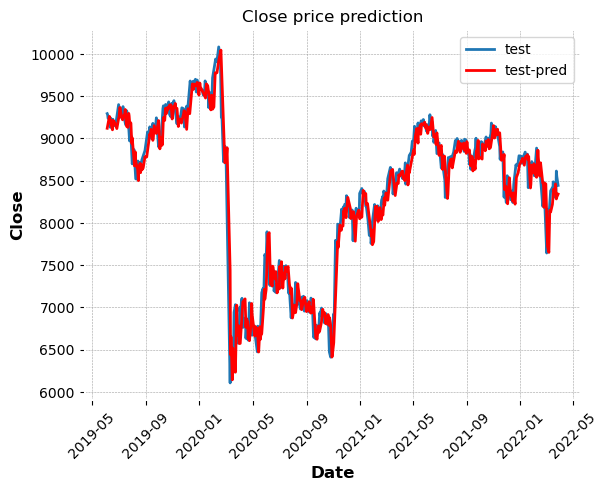

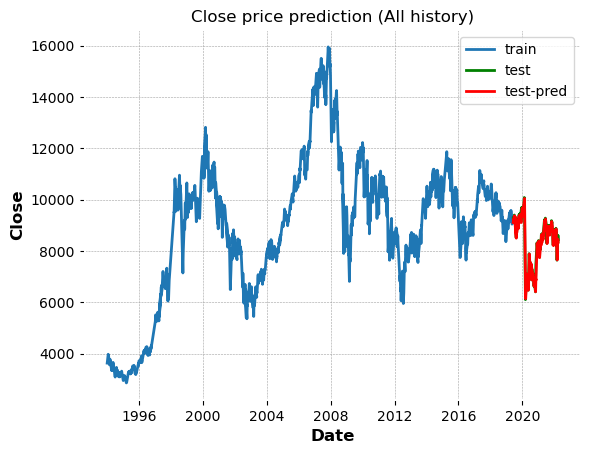

In [24]:
y_pred = reg.predict(X_test)
y_pred = pd.DataFrame(data=y_pred, columns=[CLOSE], index=X_test.index)

plt.title('Close price prediction')
plt.ylabel(CLOSE)
plt.xlabel(DATE)
plt.xticks(rotation=45)
plt.plot(y_test[:-3], label='test')
plt.plot(y_pred[:-3], color='red', label='test-pred')
plt.legend()
plt.show()

plt.title('Close price prediction (All history)')
plt.ylabel(CLOSE)
plt.xlabel(DATE)
plt.plot(y_train[:-3], label='train')
plt.plot(y_test[:-3], color ='green', label='test')
plt.plot(y_pred[:-3], color='red', label='test-pred')
plt.legend()
plt.show()

In [25]:
print('> MAX:', max_error(y_true=y_test, y_pred=y_pred))
print('> MSE:', mean_squared_error(y_true=y_test, y_pred=y_pred))
print('> MAE:', mean_absolute_error(y_true=y_test, y_pred=y_pred))

> MAX: 8593.979004654258
> MSE: 343045.8851025196
> MAE: 175.49642862895098


Clearly we can see that the mean absolute error is around 175, if the MAE mantains it's value we could say approx. that:

\begin{align}
    close_{day+3} = close_{day+3} \pm 180
\end{align}

In [26]:
df_test[f'{CLOSE}-3-pred'] = y_pred
df_test[f'{TARGET}-pred'] = df_test[f'{CLOSE}-3-pred'] + 30 > df_test[CLOSE]
df_test[f'{TARGET}-pred'] = df_test[f'{TARGET}-pred'].astype(int)

df_test

f1_score(
    average='macro',
    y_true=df_test[TARGET],
    y_pred=df_test[f'{TARGET}-pred']
)

0.4822884537729932

Not a very good result

# **Neural Network**

In [27]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_test = pd.read_csv('test_x.csv', index_col=1, parse_dates=True)

test_target_size = len(df_test)
target = np.zeros(test_target_size).astype(int)
for test_index in range(test_target_size-3):
    target[test_index] = df_test.iloc[test_index+3][CLOSE] > df_test.iloc[test_index][CLOSE]

df_test[TARGET] = target
df_test

X_train = df_train.iloc[:, :-3]
y_train = df_train[TARGET]

X_test = df_test.iloc[:, :-1].drop(TEST_INDEX, axis=1)
y_test = df_test[TARGET]

In [28]:
# NOTE: Very important to scale the data!
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [29]:
mlp = MLPClassifier(
    solver='sgd',
    activation='tanh',
    alpha=0.05,
    hidden_layer_sizes=(70, 70)
)

mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# **Conclusions**

Finally, we did not archive great results, the best f1_score has been 50% approx.